In [8]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt # 학습 결과 플롯용 패키지
from sklearn import datasets

In [9]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

Instructions for updating:
non-resource variables are not supported in the long term


In [10]:
tf.__version__

'2.1.0'

In [11]:
boston = datasets.load_boston()
boston_slice = [x[5] for x in boston.data] #6번째 피처만 사용

# 텐서플로에서 사용할 크기로 조정 
# reshape 함수로 데이터를 열이 1인 배열형으로 변환
data_x=np.array(boston_slice).reshape(-1,1)
data_y=boston.target.reshape(-1,1) 

In [12]:
print(data_x.shape, data_y.shape)

(506, 1) (506, 1)


In [13]:
# 입력데이터의 샘플 수를 얻습니다
n_sample = data_x.shape[0] 
# 샘플수피처수의 플레이스홀더. 피처를 하나만 사용하므로 피처수는 1이 됩니다.
X = tf.placeholder(tf.float32, shape=(n_sample,1), name='X') 
# 샘플수타깃수의 플레이스홀더. 타깃수가 집값 하나이므로 1이 됩니다.
y = tf.placeholder(tf.float32, shape=(n_sample,1), name='y')
# 기울기. 피처수타깃수의 크기를 가집니다. 피처 수와 타깃수이 1이므로 기울기는 11로 정의됩니다. 
W = tf.Variable(tf.zeros((1,1)),name='weights')
# 편향. 타깃수타깃수의 크기를 가집니다. 타깃수가 1이므로 기울기는 11로 정의됩니다. 
b = tf.Variable(tf.zeros((1,1)), name='bias')

In [14]:
y_pred = tf.matmul(X,W) + b # 모델
loss = tf.reduce_mean(tf.square(y_pred - y)) # 손실 함수
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001) #최적화 클래스
train_op = optimizer.minimize(loss)  # 최적화 함수. 손실 함수의 최솟값을 찾습니다.
summary_op = tf.summary.scalar('loss',loss) # 시각화를 위한 서머리 함수. 손실 함수의 변화를 기록합니다.


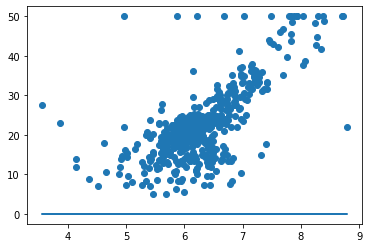

loss =  592.1470
loss =  155.3170
loss =  76.3167
loss =  62.0246
loss =  59.4341
loss =  58.9596
loss =  58.8678
loss =  58.8452
loss =  58.8351
loss =  58.8273


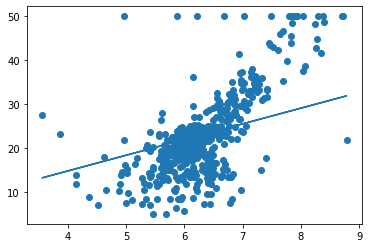

<Figure size 432x288 with 0 Axes>

In [15]:
def plot_graph(y, fout):
    """데이터 플롯을 위한 함수. 입력값(피처값), 출력값(집값)을 플롯합니다"""

    plt.scatter(data_x.reshape(1, -1)[0], boston.target.reshape(1, -1)[0])
    plt.plot(data_x.reshape(1, -1)[0], y.reshape(1, -1)[0])
    plt.show() # 이미지를 주피터 노트북에 표시합니다
    plt.savefig(fout)
    plt.clf()

with tf.Session() as sess:
    # 코드 안에서 세션을 정의합니다.
    sess.run(tf.global_variables_initializer())  # 변수초기화

    # 텐서보드용 서머리 라이터를 위에서 지정한 디렉터리와 그래프를 이용하여 생성
    summary_writer = tf.summary.FileWriter( './graphs', sess.graph)

    # 학습 전의 예측된 기울기 상태
    y_pred_before = sess.run(y_pred, {X: data_x})

    plot_graph(y_pred_before,'before.png')
    

    # 최적화 함수를 이용하여 기울기를 100번 업데이트
    for i in range(100):
        # loss 연산, summary_op 연산, train_op 연산을 수행합니다.
        # loss 연산의 결과를 loss_t, summary_op연산의 결과를 summary에 받습니다.
        loss_t, summary, _ = sess.run([loss, summary_op, train_op],feed_dict={X: data_x, y: data_y})
       
        # 각 업데이트마다 생성된 summary_op 함수의 결과를 서머리 라이터에 적습니다.
        summary_writer.add_summary(summary, i)

        if i%10 == 0:
            print('loss = % 4.4f' % loss_t.mean())  # 10회 학습 후의 평균 손실.
            y_pred_after = sess.run(y_pred, {X: data_x})

    y_pred_after = sess.run(y_pred, {X: data_x})
    plot_graph(y_pred_after,'after.png')
